In [2]:
import os
import time

import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt

In [7]:
train_df = pd.read_csv("/kaggle/input/isic-2024-challenge/train-metadata.csv")

/tmp/ipykernel_116643/3985166383.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("/kaggle/input/isic-2024-challenge/train-metadata.csv")


In [35]:
train_df

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401054,ISIC_9999937,0,IP_1140263,70.0,male,anterior torso,6.80,TBP tile: close-up,3D: XP,22.574335,...,IL_9520694,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999988
401055,ISIC_9999951,0,IP_5678181,60.0,male,posterior torso,3.11,TBP tile: close-up,3D: white,19.977640,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999820
401056,ISIC_9999960,0,IP_0076153,65.0,female,anterior torso,2.05,TBP tile: close-up,3D: XP,17.332567,...,IL_9852274,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999416
401057,ISIC_9999964,0,IP_5231513,30.0,female,anterior torso,2.80,TBP tile: close-up,3D: XP,22.288570,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,100.000000


In [20]:
arr = train_df["iddx_full"].unique().tolist()
print(arr)
print(len(arr))

['Benign', 'Benign::Benign epidermal proliferations::Lichen planus like keratosis', 'Benign::Benign melanocytic proliferations::Nevus::Nevus, NOS, Junctional', 'Malignant::Malignant epidermal proliferations::Squamous cell carcinoma in situ', 'Benign::Benign melanocytic proliferations::Nevus', 'Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Nodular', 'Malignant::Malignant epidermal proliferations::Squamous cell carcinoma, Invasive', 'Indeterminate::Indeterminate epidermal proliferations::Solar or actinic keratosis', 'Benign::Benign epidermal proliferations::Seborrheic keratosis', 'Benign::Benign melanocytic proliferations::Nevus::Nevus, Atypical, Dysplastic, or Clark', 'Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Superficial', 'Indeterminate::Indeterminate melanocytic proliferations::Atypical melanocytic neoplasm', 'Malignant::Malignant melanocytic proli

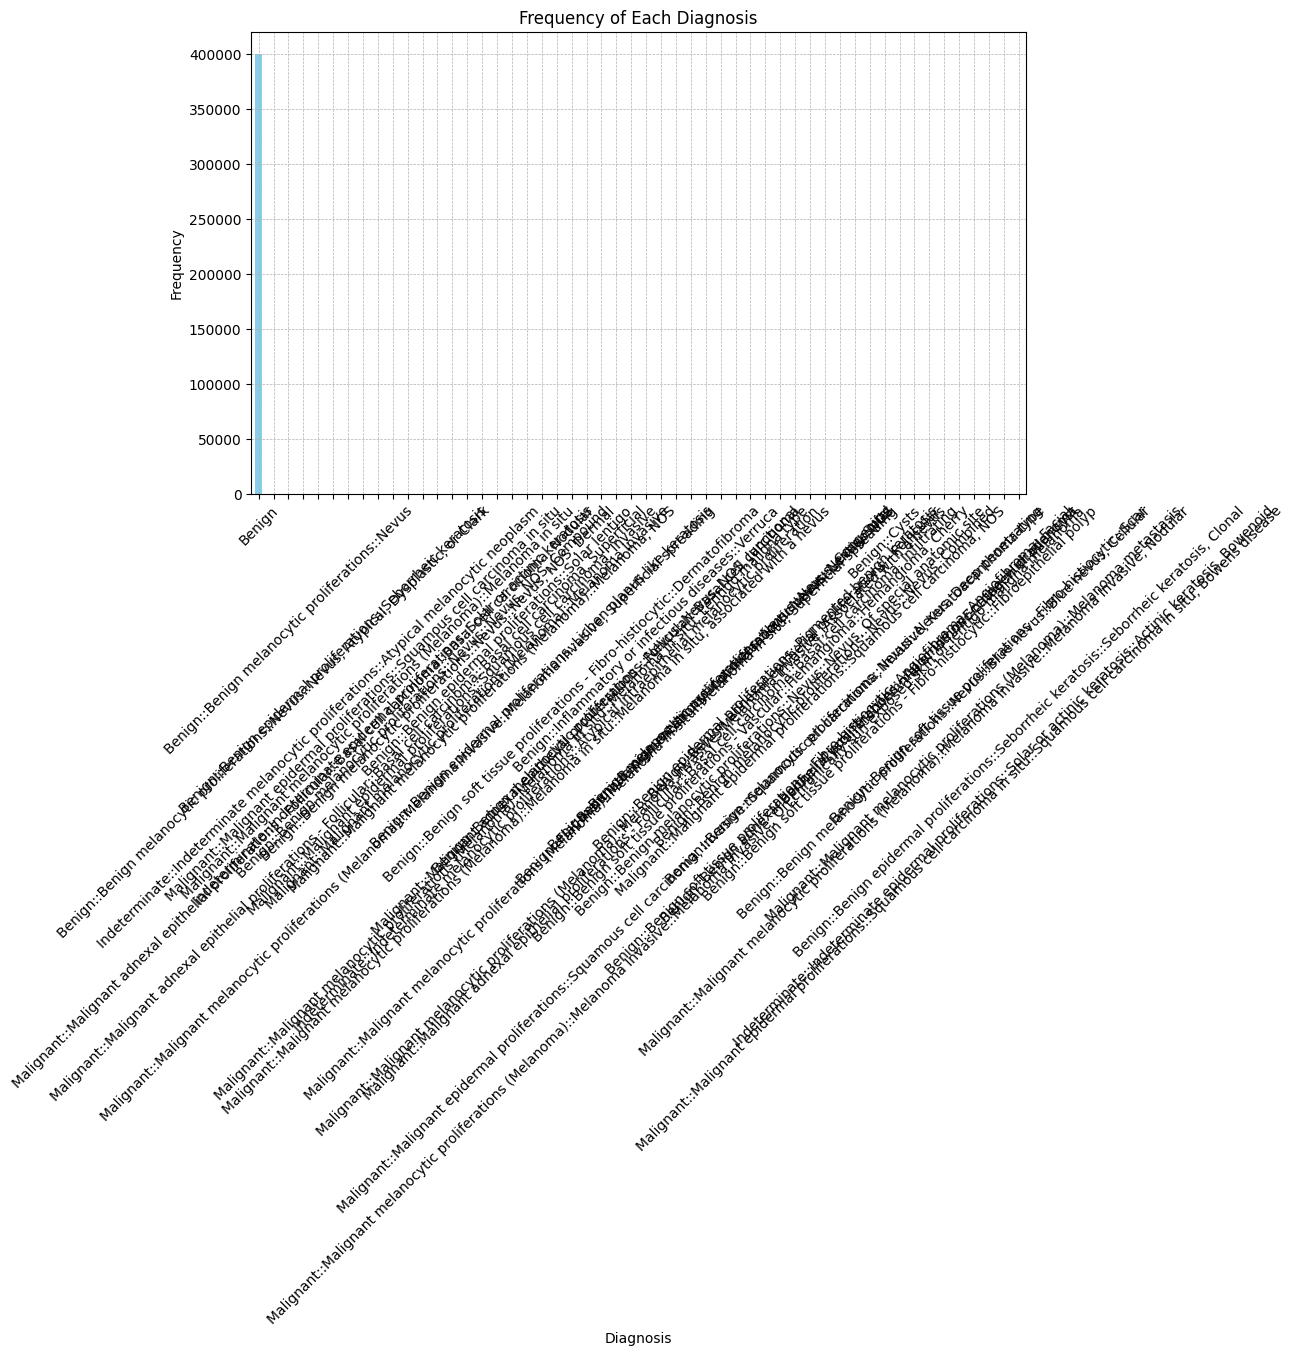

In [11]:
diagnosis_counts = train_df["iddx_full"].value_counts()

plt.figure(figsize=(10, 6))
diagnosis_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## isic2020

In [13]:
train_df_ext1 = pd.read_csv("/kaggle/input/jpeg-melanoma-256x256/train.csv")

In [14]:
train_df_ext1

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000
...,...,...,...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0,2,2592,1936
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0,11,6000,4000
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0,3,1872,1053
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0,11,1872,1053


In [15]:
# 悪性(target=1)・良性(target=0)比
num_rows = len(train_df_ext1)
num_pos = len(train_df_ext1[train_df_ext1["target"] == 1])
num_neg = len(train_df_ext1[train_df_ext1["target"] == 0])

print(f"{num_pos/num_rows=}")
print(f"{num_neg/num_rows=}")

num_pos/num_rows=0.01762965646320111
num_neg/num_rows=0.9823703435367989


In [16]:
# 患者数
num_rows = len(train_df_ext1)
num_patients = train_df_ext1["patient_id"].nunique()

print(f"{num_rows=}")
print(f"{num_patients=}")

num_rows=33126
num_patients=2056


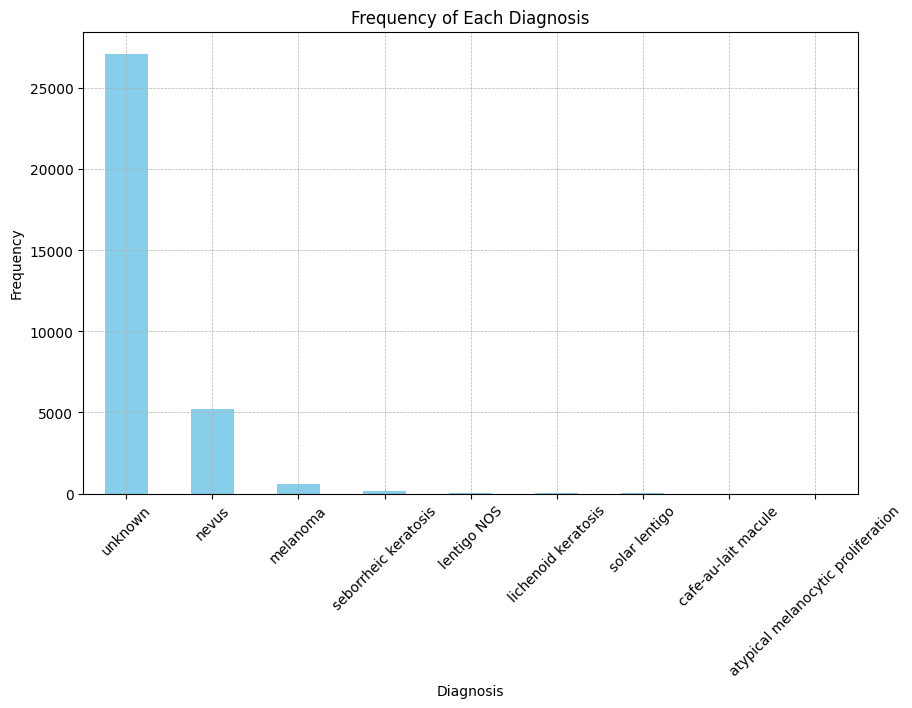

In [17]:
diagnosis_counts = train_df_ext1["diagnosis"].value_counts()

plt.figure(figsize=(10, 6))
diagnosis_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [6]:
train_df_ext2 = pd.read_csv("/kaggle/input/jpeg-isic2019-256x256/train.csv")

In [7]:
train_df_ext2

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height
0,ISIC_0000000,-1,female,55.0,anterior torso,NV,benign,0,4,1022,767
1,ISIC_0000001,-1,female,30.0,anterior torso,NV,benign,0,18,1022,767
2,ISIC_0000002,-1,female,60.0,upper extremity,MEL,malignant,1,0,1022,767
3,ISIC_0000003,-1,male,30.0,upper extremity,NV,benign,0,24,1022,767
4,ISIC_0000004,-1,male,80.0,posterior torso,MEL,malignant,1,14,1022,767
...,...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,-1,female,85.0,head/neck,BCC,benign,0,19,1024,1024
25327,ISIC_0073248,-1,male,65.0,anterior torso,BKL,benign,0,7,1024,1024
25328,ISIC_0073249,-1,male,70.0,lower extremity,MEL,malignant,1,9,1024,1024
25329,ISIC_0073251,-1,female,55.0,palms/soles,NV,benign,0,15,1024,1024


In [10]:
# 悪性(target=1)・良性(target=0)比
num_rows = len(train_df_ext2)
num_pos = len(train_df_ext2[train_df_ext2["target"] == 1])
num_neg = len(train_df_ext2[train_df_ext2["target"] == 0])

print(f"{num_pos/num_rows=}")
print(f"{num_neg/num_rows=}")

num_pos/num_rows=0.1785164423038964
num_neg/num_rows=0.8214835576961036


In [11]:
# 患者数
num_rows = len(train_df_ext2)
num_patients = train_df_ext2["patient_id"].nunique()

print(f"{num_rows=}")
print(f"{num_patients=}")

num_rows=25331
num_patients=1


## All isic data

In [3]:
train_df_extall = pd.read_csv("/kaggle/input/all-isic-data/metadata.csv")

/tmp/ipykernel_116643/3996933623.py:1: DtypeWarning: Columns (8,13,16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df_extall = pd.read_csv("/kaggle/input/all-isic-data/metadata.csv")


In [4]:
train_df_extall

,isic_id,attribution,copyright_license,acquisition_day,age_approx,anatom_site_general,benign_malignant,clin_size_long_diam_mm,concomitant_biopsy,dermoscopic_type,...,mel_thick_mm,mel_type,mel_ulcer,melanocytic,nevus_type,patient_id,personal_hx_mm,pixels_x,pixels_y,sex
0,ISIC_7559201,Memorial Sloan Kettering Cancer Center,CC-BY,2497.0,55.0,anterior torso,benign,6.6,NaN,contact non-polarized,...,NaN,NaN,NaN,True,NaN,IP_1238256,True,3264,2448,female
1,ISIC_0485014,Memorial Sloan Kettering Cancer Center,CC-BY,1.0,45.0,lower extremity,benign,NaN,NaN,contact non-polarized,...,NaN,NaN,NaN,True,NaN,IP_3227071,NaN,6000,4000,female
2,ISIC_5257439,Memorial Sloan Kettering Cancer Center,CC-BY,2360.0,40.0,lateral torso,benign,4.2,NaN,NaN,...,NaN,NaN,NaN,True,NaN,IP_7407753,True,3264,2448,female
3,ISIC_2989732,Memorial Sloan Kettering Cancer Center,CC-BY,78.0,80.0,anterior torso,benign,NaN,NaN,non-contact polarized,...,NaN,NaN,NaN,True,NaN,IP_2597637,NaN,6000,4000,male
4,ISIC_5638210,Memorial Sloan Kettering Cancer Center,CC-BY,78.0,80.0,anterior torso,benign,NaN,NaN,contact non-polarized,...,NaN,NaN,NaN,True,NaN,IP_2597637,NaN,6000,4000,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81717,ISIC_0000004,Anonymous,CC-0,NaN,80.0,posterior torso,malignant,NaN,True,NaN,...,NaN,NaN,NaN,True,NaN,NaN,NaN,1022,767,male
81718,ISIC_0000003,Anonymous,CC-0,NaN,30.0,upper extremity,benign,NaN,False,NaN,...,NaN,NaN,NaN,True,NaN,NaN,NaN,1022,767,male
81719,ISIC_0000002,Anonymous,CC-0,NaN,60.0,upper extremity,malignant,NaN,True,NaN,...,NaN,NaN,NaN,True,NaN,NaN,NaN,1022,767,female
81720,ISIC_0000001,Anonymous,CC-0,NaN,30.0,anterior torso,benign,NaN,False,NaN,...,NaN,NaN,NaN,True,NaN,NaN,NaN,1022,767,female


In [22]:
train_df_extall["benign_malignant"].unique()

array(['benign', 'indeterminate/malignant', 'indeterminate/benign',
       'malignant', nan, 'indeterminate'], dtype=object)

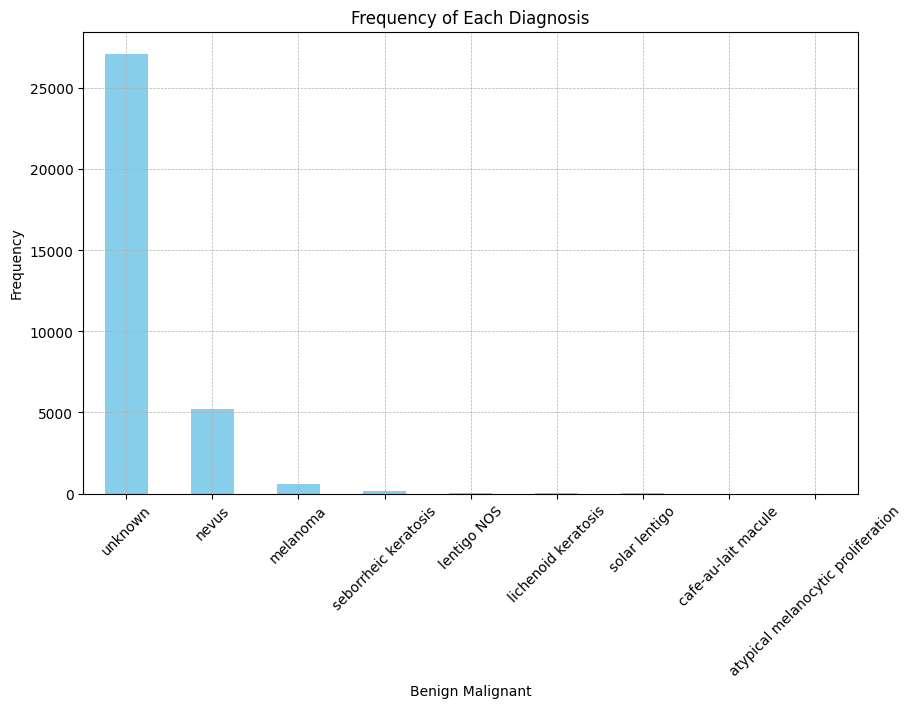

In [21]:
benign_malignant_counts = train_df_extall["benign_malignant"].value_counts()

plt.figure(figsize=(10, 6))
diagnosis_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Diagnosis')
plt.xlabel('Benign Malignant')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

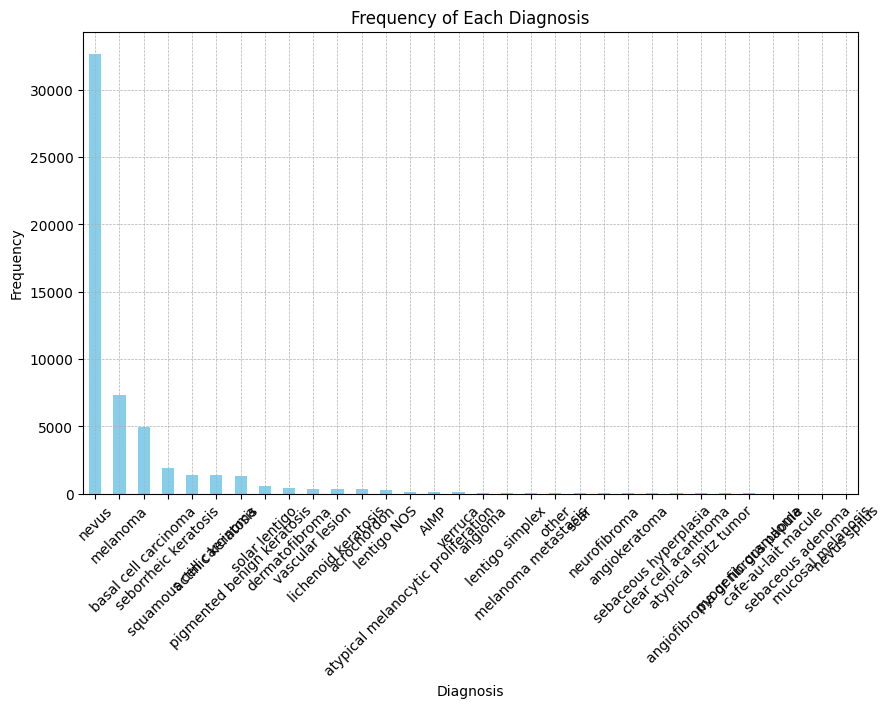

In [6]:
diagnosis_counts = train_df_extall["diagnosis"].value_counts()

plt.figure(figsize=(10, 6))
diagnosis_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [25]:
train_df_extall.duplicated().sum()

0

In [33]:
print(len(train_df_extall["patient_id"]))
print(train_df_extall["patient_id"].isnull().sum())

81722
40594


In [34]:

print(len(train_df["patient_id"]))
print(train_df["patient_id"].isnull().sum())

401059
0
